## PageRank using Networkx

In this notebook, we'll introduce the networkx package used to work with graph data in Python. We will look at PageRank and power iteration on a few graph datasets.

Graphs are made up of a set of vertices (nodes) and a set of edges connecting the nodes.

In networkx, there are four main classes of graphs:
- Graph()
- DiGraph()
- MultiGraph()
- MultiDiGraph()

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
edge_list = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 0),
    (0, 3)
]

In [3]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [4]:
print(G)

Graph with 5 nodes and 6 edges


In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [6]:
G.edges()

EdgeView([(0, 1), (0, 4), (0, 3), (1, 2), (2, 3), (3, 4)])

In [7]:
G.has_edge(0, 1)

True

In [8]:
G.has_edge(1, 0)

True

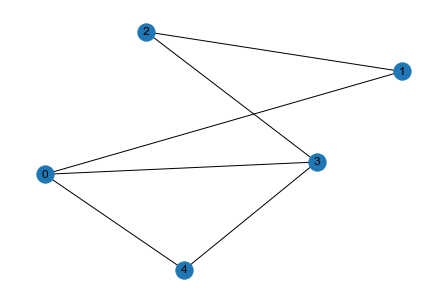

In [9]:
nx.draw(G, with_labels=True)

***

In [10]:
G_directed = nx.DiGraph()
G_directed.add_edges_from(edge_list)

In [11]:
print(G_directed)

DiGraph with 5 nodes and 6 edges


In [12]:
G_directed.has_edge(0, 1)

True

In [13]:
G_directed.has_edge(1, 0)

False

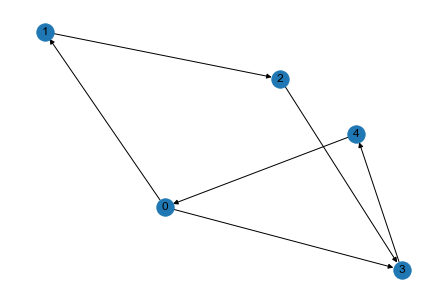

In [14]:
nx.draw(G_directed, with_labels=True)

***

In [15]:
users = [
    ('Josh', {'fav_color': 'orange', 'is_student': True}),
    ('Michael', {'fav_color': 'blue', 'is_student': True}),
    ('Siddharth', {'fav_color': 'green', 'is_student': False})
]

In [16]:
G_lab = nx.Graph()
G_lab.add_nodes_from(users)

In [17]:
for node, data in G_lab.nodes(data=True):
    print(node)
    print(f'  {data}')

Josh
  {'fav_color': 'orange', 'is_student': True}
Michael
  {'fav_color': 'blue', 'is_student': True}
Siddharth
  {'fav_color': 'green', 'is_student': False}


***

In [18]:
G_karate = nx.karate_club_graph()

In [19]:
print(G_karate)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


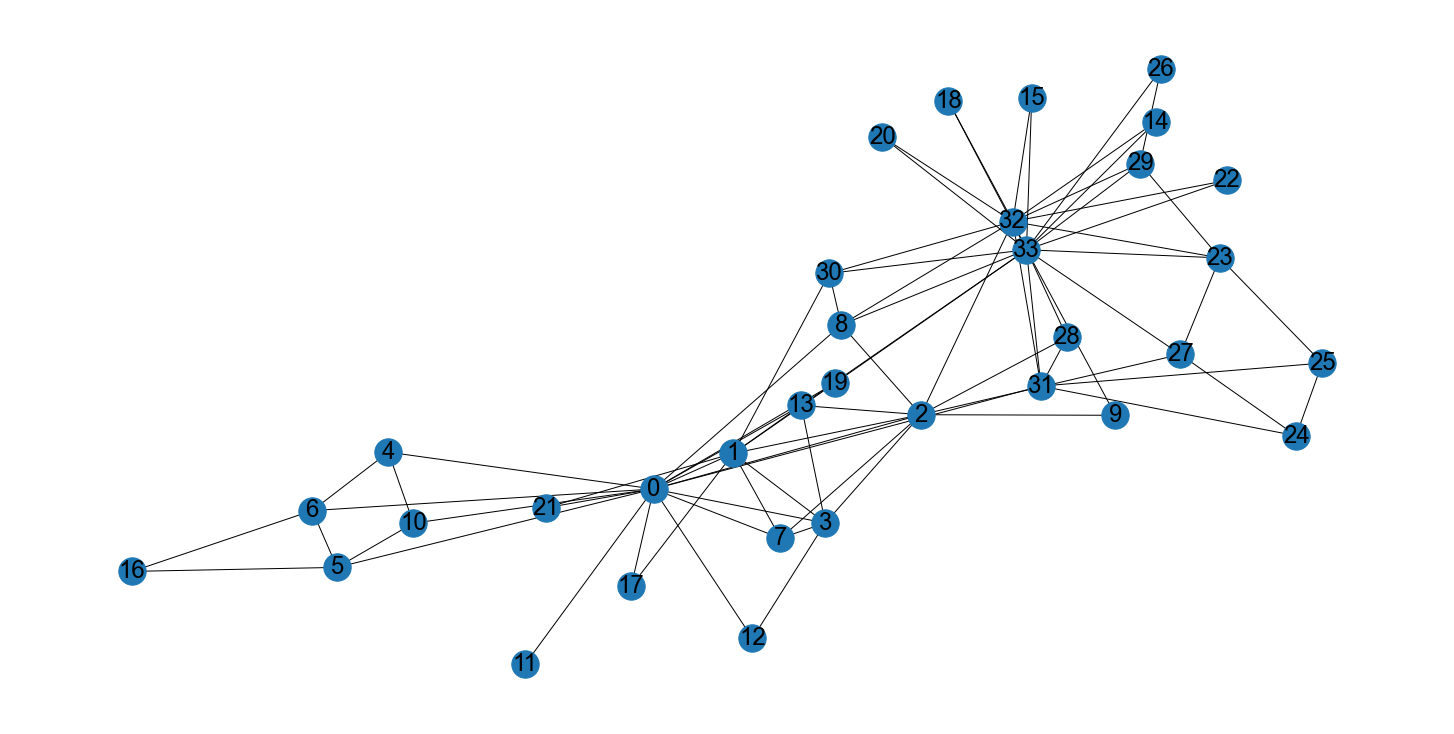

In [20]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, pos=pos, with_labels=True, node_size=750, font_size=24)

In [21]:
deg = sorted(G_karate.degree(), key=lambda x: x[1], reverse=True)
deg

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5),
 (5, 4),
 (6, 4),
 (7, 4),
 (27, 4),
 (29, 4),
 (30, 4),
 (4, 3),
 (10, 3),
 (19, 3),
 (24, 3),
 (25, 3),
 (28, 3),
 (9, 2),
 (12, 2),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (26, 2),
 (11, 1)]

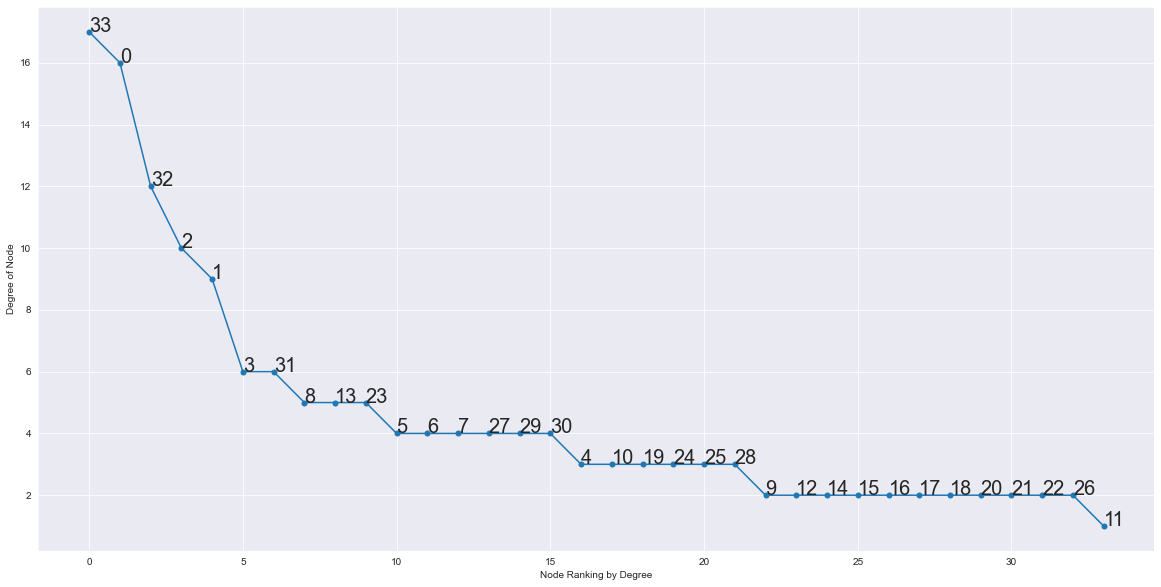

In [22]:
plt.figure(figsize=(20, 10))

plt.plot([d[1] for d in deg], marker='.', markersize=10)

for i, (n_id, d) in enumerate(deg):
    plt.annotate(str(n_id), (i, d), fontsize=20)

plt.ylabel('Degree of Node')
plt.xlabel('Node Ranking by Degree')
plt.show()

### PageRank Example

One way to represent a graph as a matrix is the **adjacency matrix**. It is a square matrix where elements represent whether two nodes have an edge between them (two nodes are adjacent)

In [23]:
adj = nx.adjacency_matrix(G_karate).todense()

In [24]:
np.set_printoptions(threshold=np.inf)

print(adj.shape)
print(adj)

(34, 34)
[[0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
print(adj.sum())

156


In [26]:
print(adj.sum(axis=1))

[[16]
 [ 9]
 [10]
 [ 6]
 [ 3]
 [ 4]
 [ 4]
 [ 4]
 [ 5]
 [ 2]
 [ 3]
 [ 1]
 [ 2]
 [ 5]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 2]
 [ 2]
 [ 2]
 [ 5]
 [ 3]
 [ 3]
 [ 2]
 [ 4]
 [ 3]
 [ 4]
 [ 4]
 [ 6]
 [12]
 [17]]


In [27]:
for node, deg in G_karate.degree():
    print(f'{node}: {deg}')

0: 16
1: 9
2: 10
3: 6
4: 3
5: 4
6: 4
7: 4
8: 5
9: 2
10: 3
11: 1
12: 2
13: 5
14: 2
15: 2
16: 2
17: 2
18: 2
19: 3
20: 2
21: 2
22: 2
23: 5
24: 3
25: 3
26: 2
27: 4
28: 3
29: 4
30: 4
31: 6
32: 12
33: 17


Want to normalize each row by the node's degree

In [28]:
transition_mat =  adj / adj.sum(axis=1)

In [29]:
np.round(transition_mat, 2)

array([[0.  , 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.  , 0.06,
        0.06, 0.06, 0.06, 0.  , 0.  , 0.  , 0.06, 0.  , 0.06, 0.  , 0.06,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  ,
        0.  ],
       [0.11, 0.  , 0.11, 0.11, 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.11, 0.  , 0.11, 0.  , 0.11,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.  ,
        0.  ],
       [0.1 , 0.1 , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.1 , 0.1 , 0.1 , 0.  ,
        0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.1 , 0.  , 0.  , 0.  , 0.1 ,
        0.  ],
       [0.17, 0.17, 0.17, 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.  , 0.  ,
        0.  , 0.17, 0.17, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.

In [30]:
transition_mat.sum(axis=1)

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

We now have a matrix that represents the probability of randomly visiting nodes in the graph called the **Stochastic Adjacency Matrix** or **Transition Matrix**.

$$ M = AD^{-1}, \, row\: stochastic $$

$$ M = D^{-1}A, \, column \: stochastic $$

Where $D$ is the diagonal degree matrix and $A$ is the adjacency matrix. Rank vector $r$ is a vector containing an importance score for each node. With this formulation, the Flow equations can be written as:
$$ r = r \cdot M $$

In [31]:
num_nodes = G_karate.number_of_nodes()
rank = np.full(num_nodes, (1 / num_nodes))

In [32]:
rank.shape

(34,)

In [33]:
rank

array([0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176, 0.02941176,
       0.02941176, 0.02941176, 0.02941176, 0.02941176])

In [34]:
max_iter = 100
eps = 1.0e-6
for step in range(max_iter):
    old_rank = rank.copy()
    
    rank = rank @ transition_mat
    
#     print(rank)
#     print(rank.sum())
#     print()
    
    norm = np.linalg.norm((rank - old_rank), ord=1)
    if norm < eps:
        print(f'Converged: {step}')
        break

Converged: 46


In [35]:
rank

matrix([[0.10257062, 0.05769418, 0.06410241, 0.03846309, 0.01923331,
         0.02564483, 0.02564483, 0.02564201, 0.03205063, 0.01282008,
         0.01923331, 0.00641072, 0.01282128, 0.03205185, 0.01281964,
         0.01281964, 0.01282271, 0.01282122, 0.01281964, 0.01923106,
         0.01281964, 0.01282122, 0.01281964, 0.03204887, 0.01922948,
         0.01922939, 0.01281952, 0.02563954, 0.01923001, 0.02563903,
         0.02564024, 0.03845981, 0.0769183 , 0.10896826]])

In [36]:
rank.sum()

1.0

In [37]:
step

46

In [38]:
pg_rank = nx.pagerank(G_karate, alpha=1)

In [39]:
pg_rank

{0: 0.10258732866623702,
 1: 0.057698911670884354,
 2: 0.0641019731805403,
 3: 0.03846706453008368,
 4: 0.019239895930638264,
 5: 0.025654695211535634,
 6: 0.025654695211535634,
 7: 0.025644576603110397,
 8: 0.03204898906083085,
 9: 0.012818982695025892,
 10: 0.019239895930638268,
 11: 0.00641194596887785,
 12: 0.012823265288606549,
 13: 0.03205336809014344,
 14: 0.012817420495714174,
 15: 0.012817420495714174,
 16: 0.012828380951615845,
 17: 0.012823066075388849,
 18: 0.012817420495714174,
 19: 0.01923185756242189,
 20: 0.012817420495714174,
 21: 0.012823066075388849,
 22: 0.012817420495714174,
 23: 0.03204269428424956,
 24: 0.019226145287377205,
 25: 0.019225807782670815,
 26: 0.01281697759465578,
 27: 0.025635732871232143,
 28: 0.019228040301490452,
 29: 0.025633885269922777,
 30: 0.025638249725074974,
 31: 0.03845542487919588,
 32: 0.07690575160329001,
 33: 0.10895222921876566}

In [40]:
sum(pg_rank.values())

0.9999999999999999

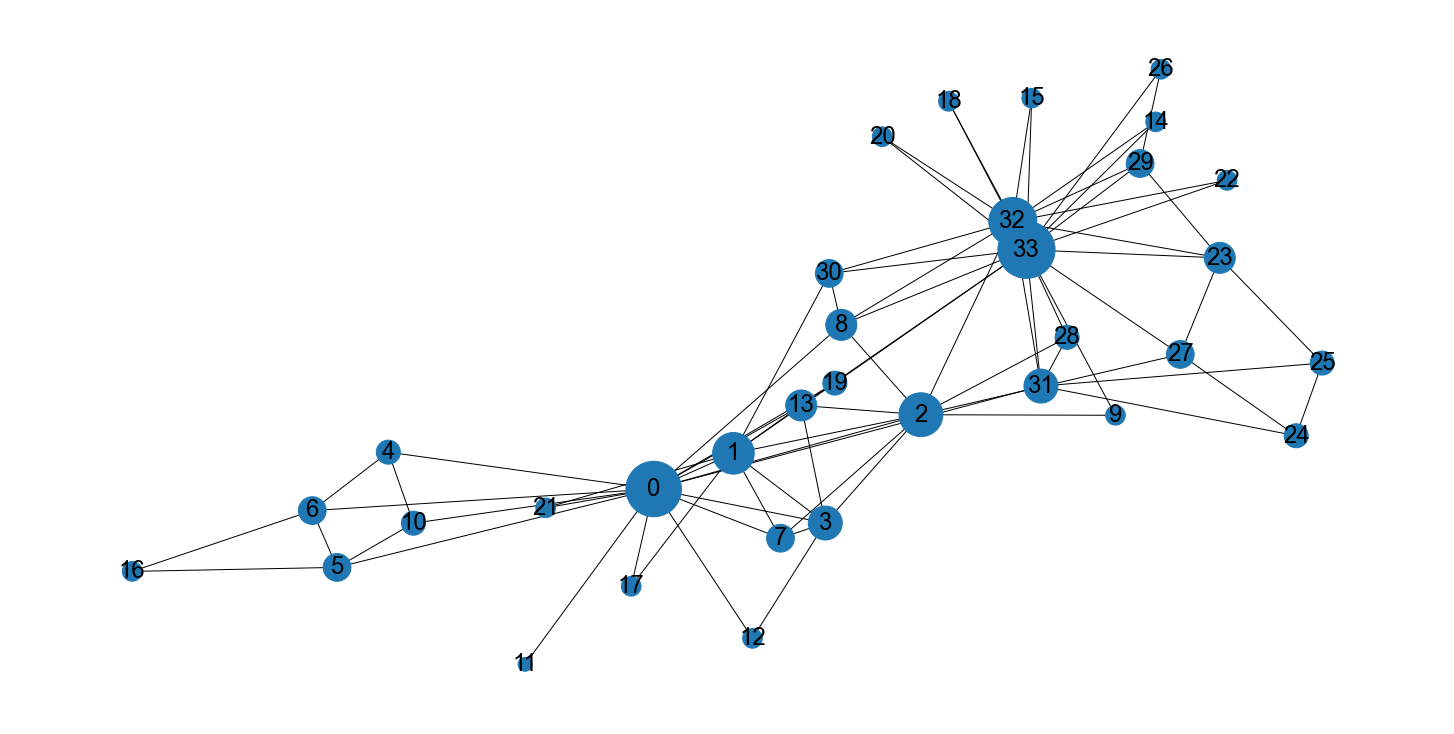

In [41]:
plt.figure(figsize=(20, 10))
nx.draw(G_karate, pos=pos, with_labels=True, font_size=24,
        nodelist=pg_rank.keys(),
        node_size=[v * 3e4 for v in pg_rank.values()])

In [42]:
sorted_pg_rank = sorted(pg_rank.items(), key=lambda x: x[1], reverse=True)

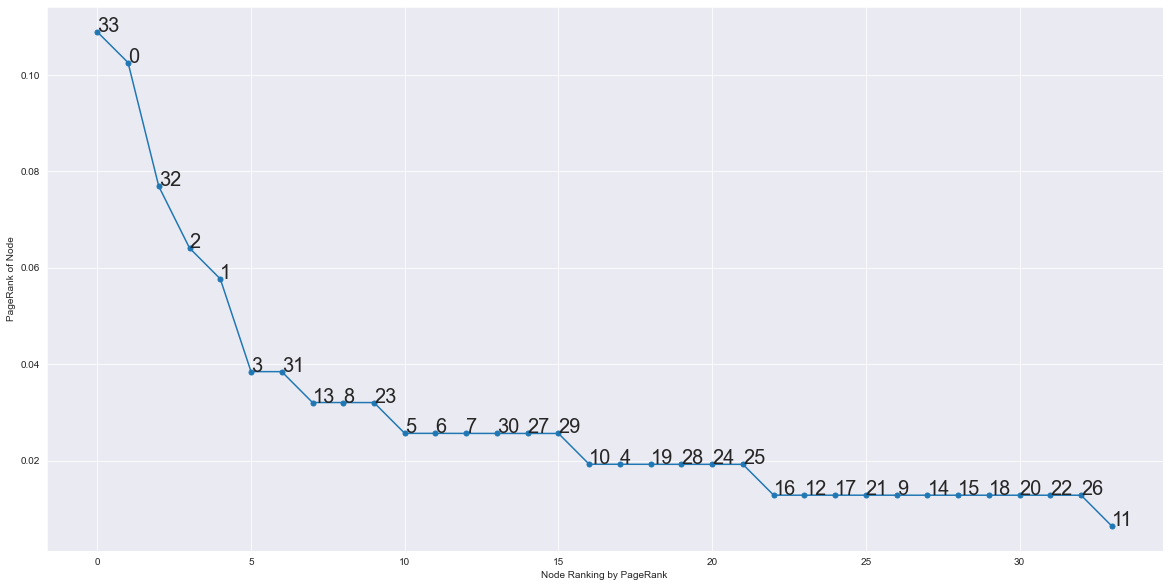

In [43]:
plt.figure(figsize=(20, 10))

plt.plot([p[1] for p in sorted_pg_rank], marker='.', markersize=10)

for i, (n_id, p) in enumerate(sorted_pg_rank):
    plt.annotate(str(n_id), (i, p), fontsize=20)

plt.ylabel('PageRank of Node')
plt.xlabel('Node Ranking by PageRank')
plt.show()

***

In [44]:
G_karate = G_karate.to_directed()
G_karate = nx.stochastic_graph(G_karate)

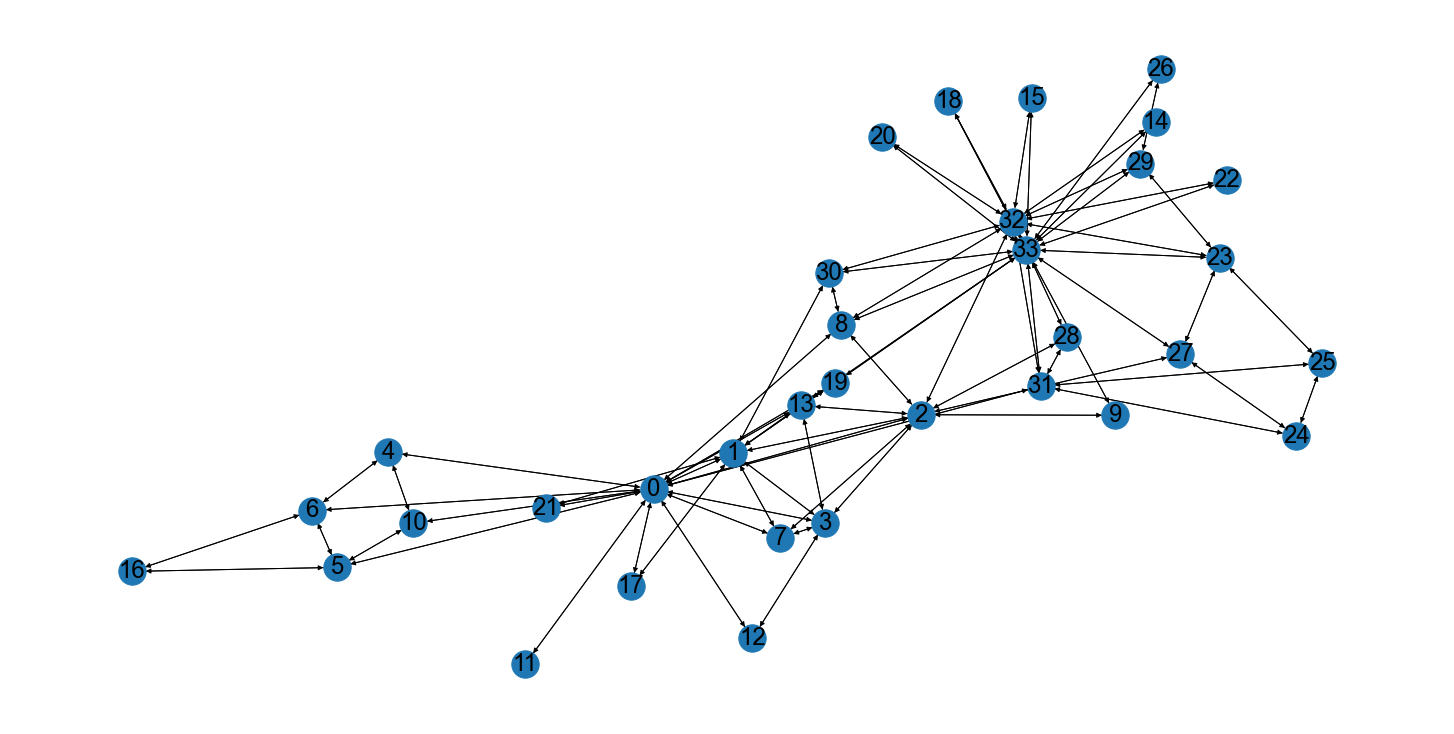

In [45]:
plt.figure(figsize=(20, 10))
nx.draw(G_karate, pos=pos, with_labels=True, node_size=750, font_size=24)

In [46]:
G_karate[0]

AtlasView({1: {'weight': 0.0625}, 2: {'weight': 0.0625}, 3: {'weight': 0.0625}, 4: {'weight': 0.0625}, 5: {'weight': 0.0625}, 6: {'weight': 0.0625}, 7: {'weight': 0.0625}, 8: {'weight': 0.0625}, 10: {'weight': 0.0625}, 11: {'weight': 0.0625}, 12: {'weight': 0.0625}, 13: {'weight': 0.0625}, 17: {'weight': 0.0625}, 19: {'weight': 0.0625}, 21: {'weight': 0.0625}, 31: {'weight': 0.0625}})

In [47]:
for node in G_karate:
    weight_sum = sum(edata['weight'] for neighbor, edata in G_karate[node].items())
    print(f'{node}: {weight_sum}')

0: 1.0
1: 1.0000000000000002
2: 0.9999999999999999
3: 0.9999999999999999
4: 1.0
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: 1.0
10: 1.0
11: 1.0
12: 1.0
13: 1.0
14: 1.0
15: 1.0
16: 1.0
17: 1.0
18: 1.0
19: 1.0
20: 1.0
21: 1.0
22: 1.0
23: 1.0
24: 1.0
25: 1.0
26: 1.0
27: 1.0
28: 1.0
29: 1.0
30: 1.0
31: 0.9999999999999999
32: 1.0
33: 1.0


In [48]:
rank = dict.fromkeys(G_karate, (1 / num_nodes))
rank

{0: 0.029411764705882353,
 1: 0.029411764705882353,
 2: 0.029411764705882353,
 3: 0.029411764705882353,
 4: 0.029411764705882353,
 5: 0.029411764705882353,
 6: 0.029411764705882353,
 7: 0.029411764705882353,
 8: 0.029411764705882353,
 9: 0.029411764705882353,
 10: 0.029411764705882353,
 11: 0.029411764705882353,
 12: 0.029411764705882353,
 13: 0.029411764705882353,
 14: 0.029411764705882353,
 15: 0.029411764705882353,
 16: 0.029411764705882353,
 17: 0.029411764705882353,
 18: 0.029411764705882353,
 19: 0.029411764705882353,
 20: 0.029411764705882353,
 21: 0.029411764705882353,
 22: 0.029411764705882353,
 23: 0.029411764705882353,
 24: 0.029411764705882353,
 25: 0.029411764705882353,
 26: 0.029411764705882353,
 27: 0.029411764705882353,
 28: 0.029411764705882353,
 29: 0.029411764705882353,
 30: 0.029411764705882353,
 31: 0.029411764705882353,
 32: 0.029411764705882353,
 33: 0.029411764705882353}

In [49]:
max_iter = 100
for step in range(max_iter):
    old_rank = rank
    rank = dict.fromkeys(old_rank.keys(), 0)
    for node in rank:
        for _, neighbor, wt in G_karate.edges(node, data='weight'):
            rank[neighbor] += old_rank[node] * wt
    
#     print(rank)
#     print(sum(rank.values()))
    
    err = sum(abs(rank[node] - old_rank[node]) for node in G_karate)
    if err < eps:
        print(f'Converged: {step}')
        break

Converged: 62


In [50]:
rank

{0: 0.1025647753223575,
 1: 0.05769250076237656,
 2: 0.06410254800412135,
 3: 0.03846169847402437,
 4: 0.019231031810198564,
 5: 0.02564141874022981,
 6: 0.025641418740229814,
 7: 0.025641127689123543,
 8: 0.03205121501220244,
 9: 0.012820468171324984,
 10: 0.019231031810198567,
 11: 0.006410304863300066,
 12: 0.012820592006826144,
 13: 0.032051341306290386,
 14: 0.012820422523410684,
 15: 0.012820422523410684,
 16: 0.012820739334110737,
 17: 0.012820585991439329,
 18: 0.012820422523410684,
 19: 0.019230799608606176,
 20: 0.012820422523410684,
 21: 0.012820585991439329,
 22: 0.012820422523410684,
 23: 0.032051033331952895,
 24: 0.019230636122096276,
 25: 0.01923062657668424,
 26: 0.012820410517354518,
 27: 0.025640872534267483,
 28: 0.01923069038506672,
 29: 0.025640819075974867,
 30: 0.0256409446143195,
 31: 0.03846136039249766,
 32: 0.07692258236081156,
 33: 0.10897372783352069}